# Assignment 2: Deceptive Visualization

https://courses.cs.washington.edu/courses/cse512/24sp/a2.html

some ideas for data:
- https://www.irishevs.com/stop-engaging-in-climate-imperialism
- https://endhomelessness.org/homelessness-in-america/homelessness-statistics/state-of-homelessness/
- https://drones.pitchinteractive.com/
- https://antievictionmap.com/
- https://docs.google.com/spreadsheets/d/1IlH_qfViJ4kaWDR44XhvWLVVybgPnY72PUP4G2HGu2k/edit#gid=1921686009
- https://www.cambridge.org/core/journals/british-journal-of-political-science/articleorigins-of-colonial-investments-in-former-british-and-french-africa/3C0185F5CD4D8755944E9D741757F9F3
- https://data.techforpalestine.org/
- https://github.com/Zain-ul-din/awesome-palestine-apis?tab=readme-ov-file

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
url = "https://www.sei-eqtrans-dev.net/api/globalHistoricalDataByYear/search.php?startyear=2019&endyear=2024"
data = requests.get(url).json()

In [3]:
data_df = pd.json_normalize(data['records'])[['PercentileLabel','IncomeShare','EmissionShare','PopulationShare']]

In [4]:
data_df['Percentile'] = data_df['PercentileLabel'].str.extract(r'p(\d+\.?\d*)p').astype(float)

In [5]:
data_df = data_df.astype({'Percentile': 'float32','EmissionShare': 'float32','IncomeShare': 'float32','PopulationShare': 'float32'})

In [6]:
interval_99_100 = data_df[data_df['Percentile'] >= 99].sum(axis=0,numeric_only=True)
data_df = pd.concat([data_df[data_df['Percentile']<99],interval_99_100.to_frame().T],ignore_index=True)
data_df.loc[99,'Percentile'] = 99
data_df['EmissionShare'] = 100*data_df['EmissionShare']
data_df['IncomeShare'] = 100*data_df['IncomeShare']

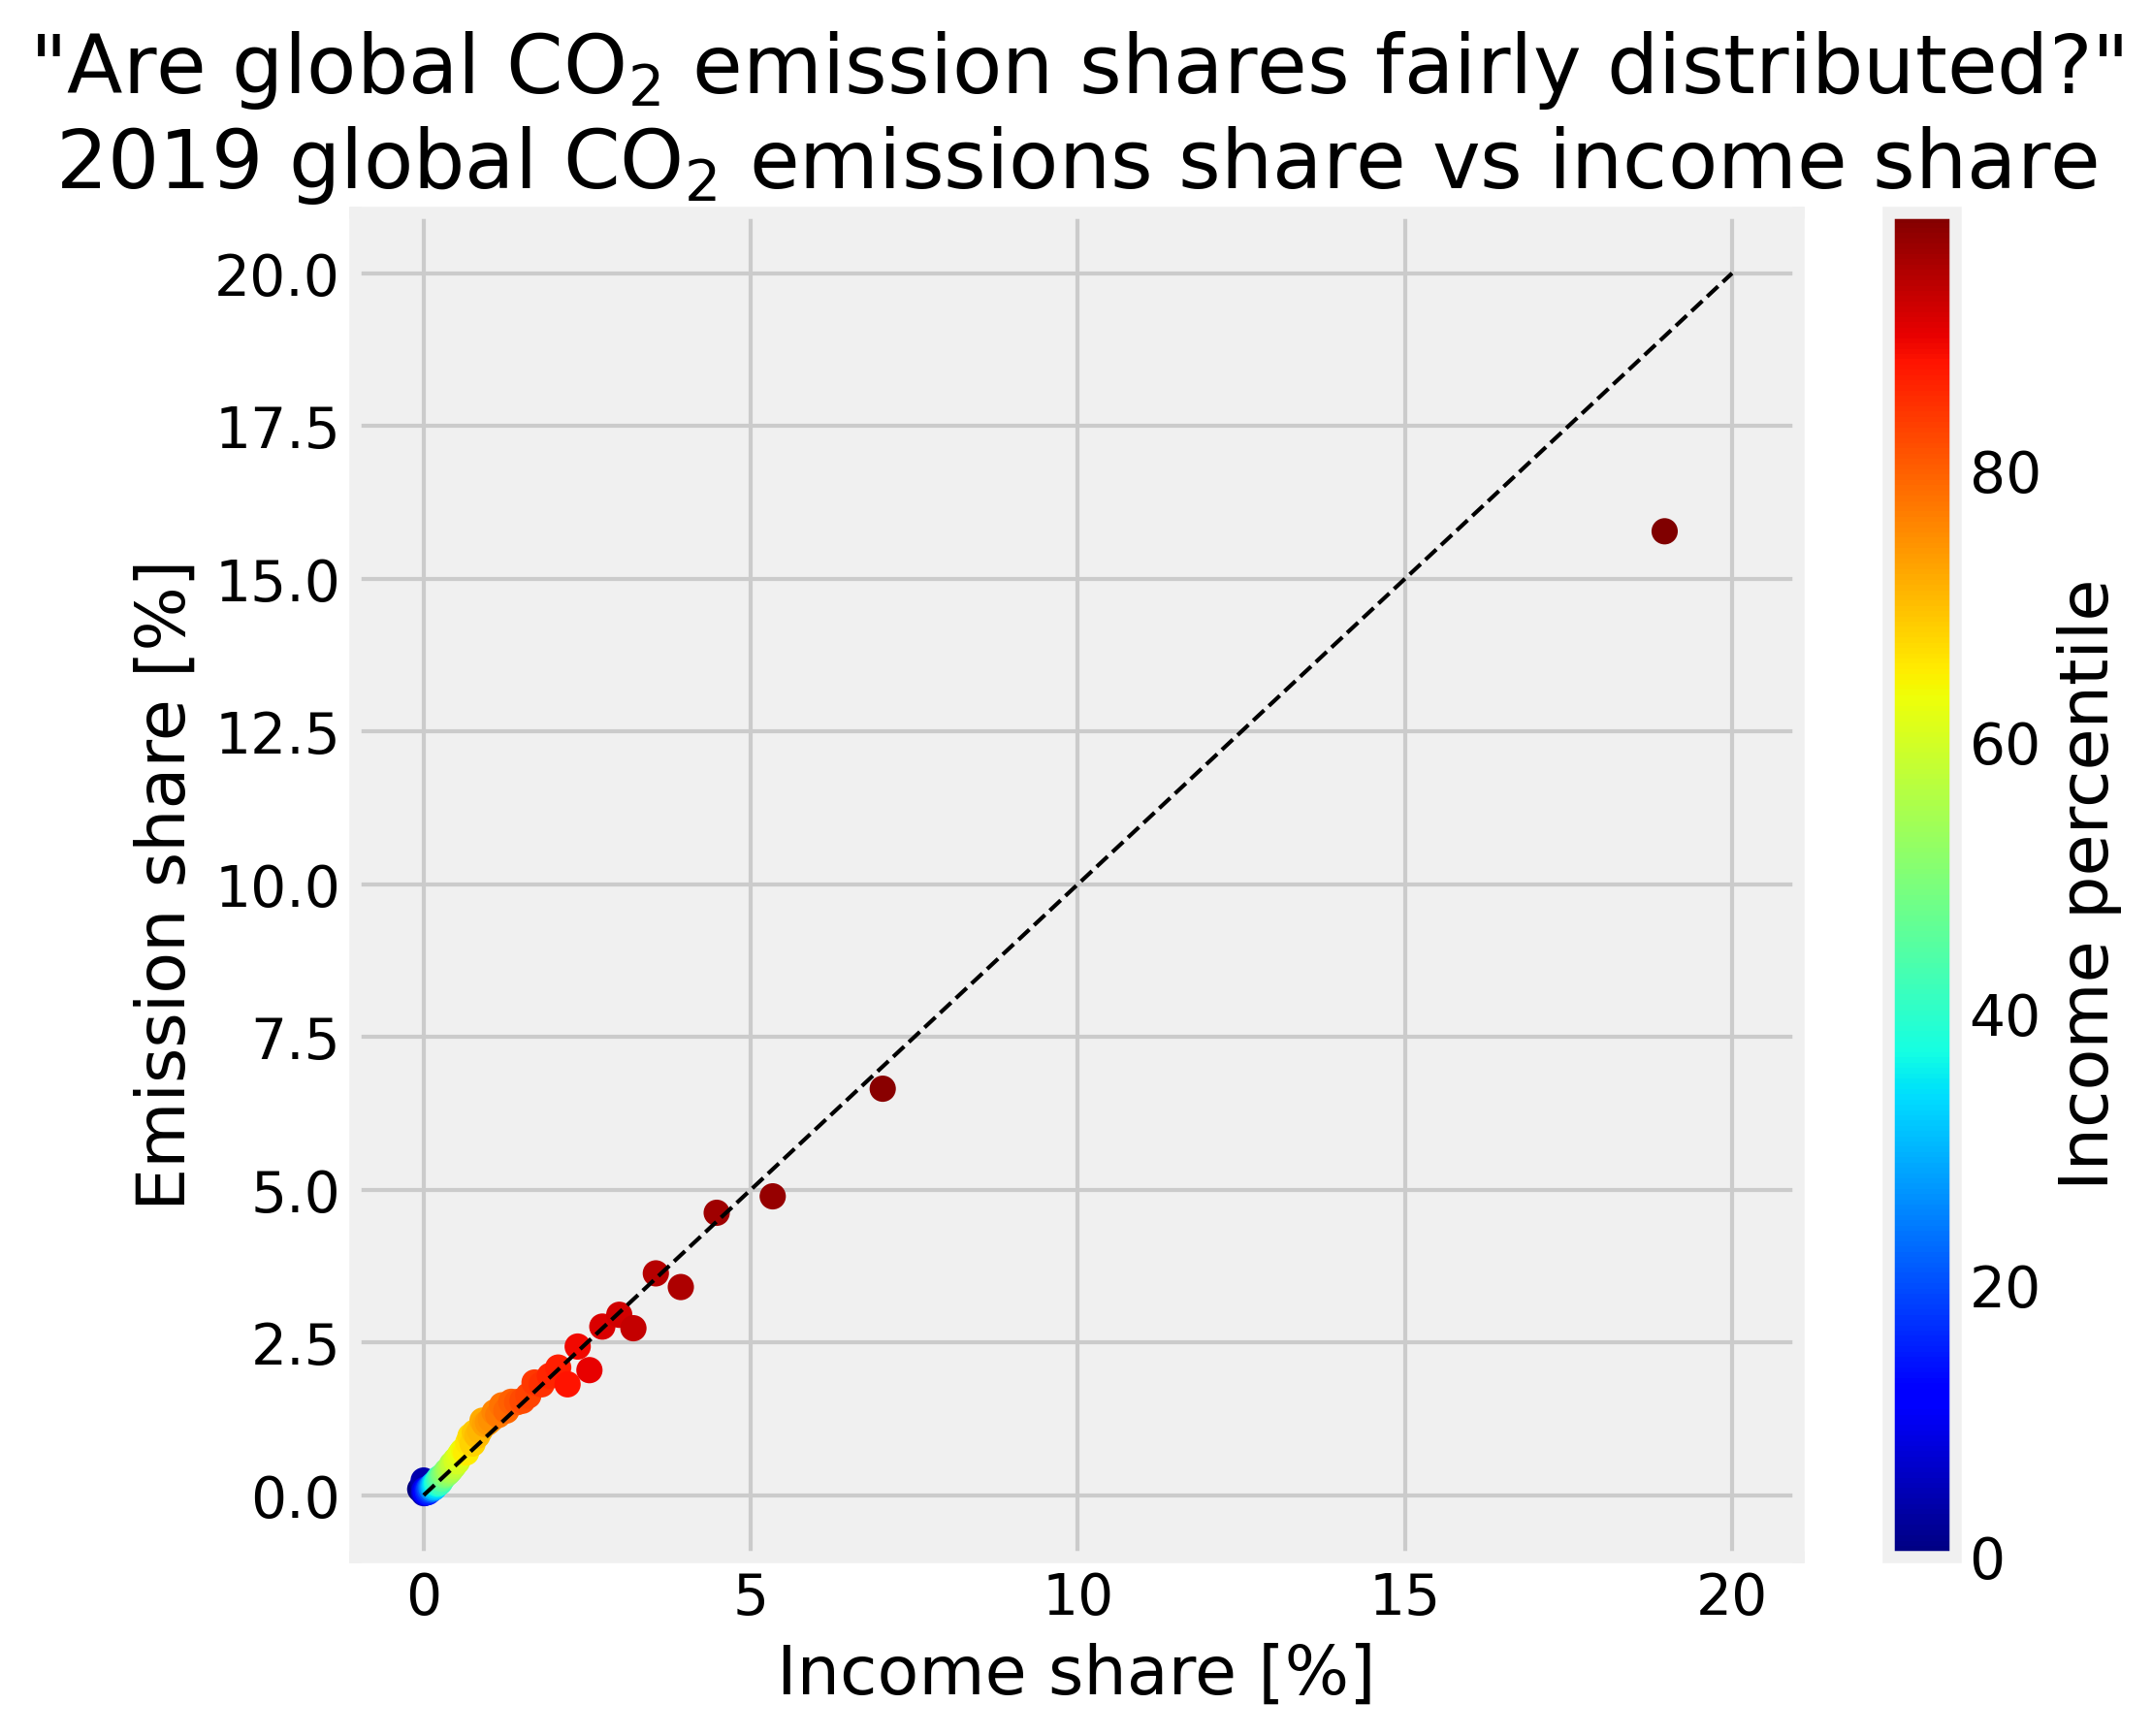

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(8, 6), dpi=300)
plt.style.use('fivethirtyeight')

plt.scatter(data_df['IncomeShare'], data_df['EmissionShare'], c=data_df['Percentile'], cmap='jet')
plt.colorbar(label='Income percentile')
plt.xlabel('Income share [%]')
plt.ylabel('Emission share [%]')
plt.title('"Are global CO$_2$ emission shares fairly distributed?"\n2019 global CO$_2$ emissions share vs income share')

# Add y=x line
plt.plot([0, 20], [0, 20], color='black', linewidth=1,linestyle='--')

plt.show()
plt.savefig('a2_deceptive.png')

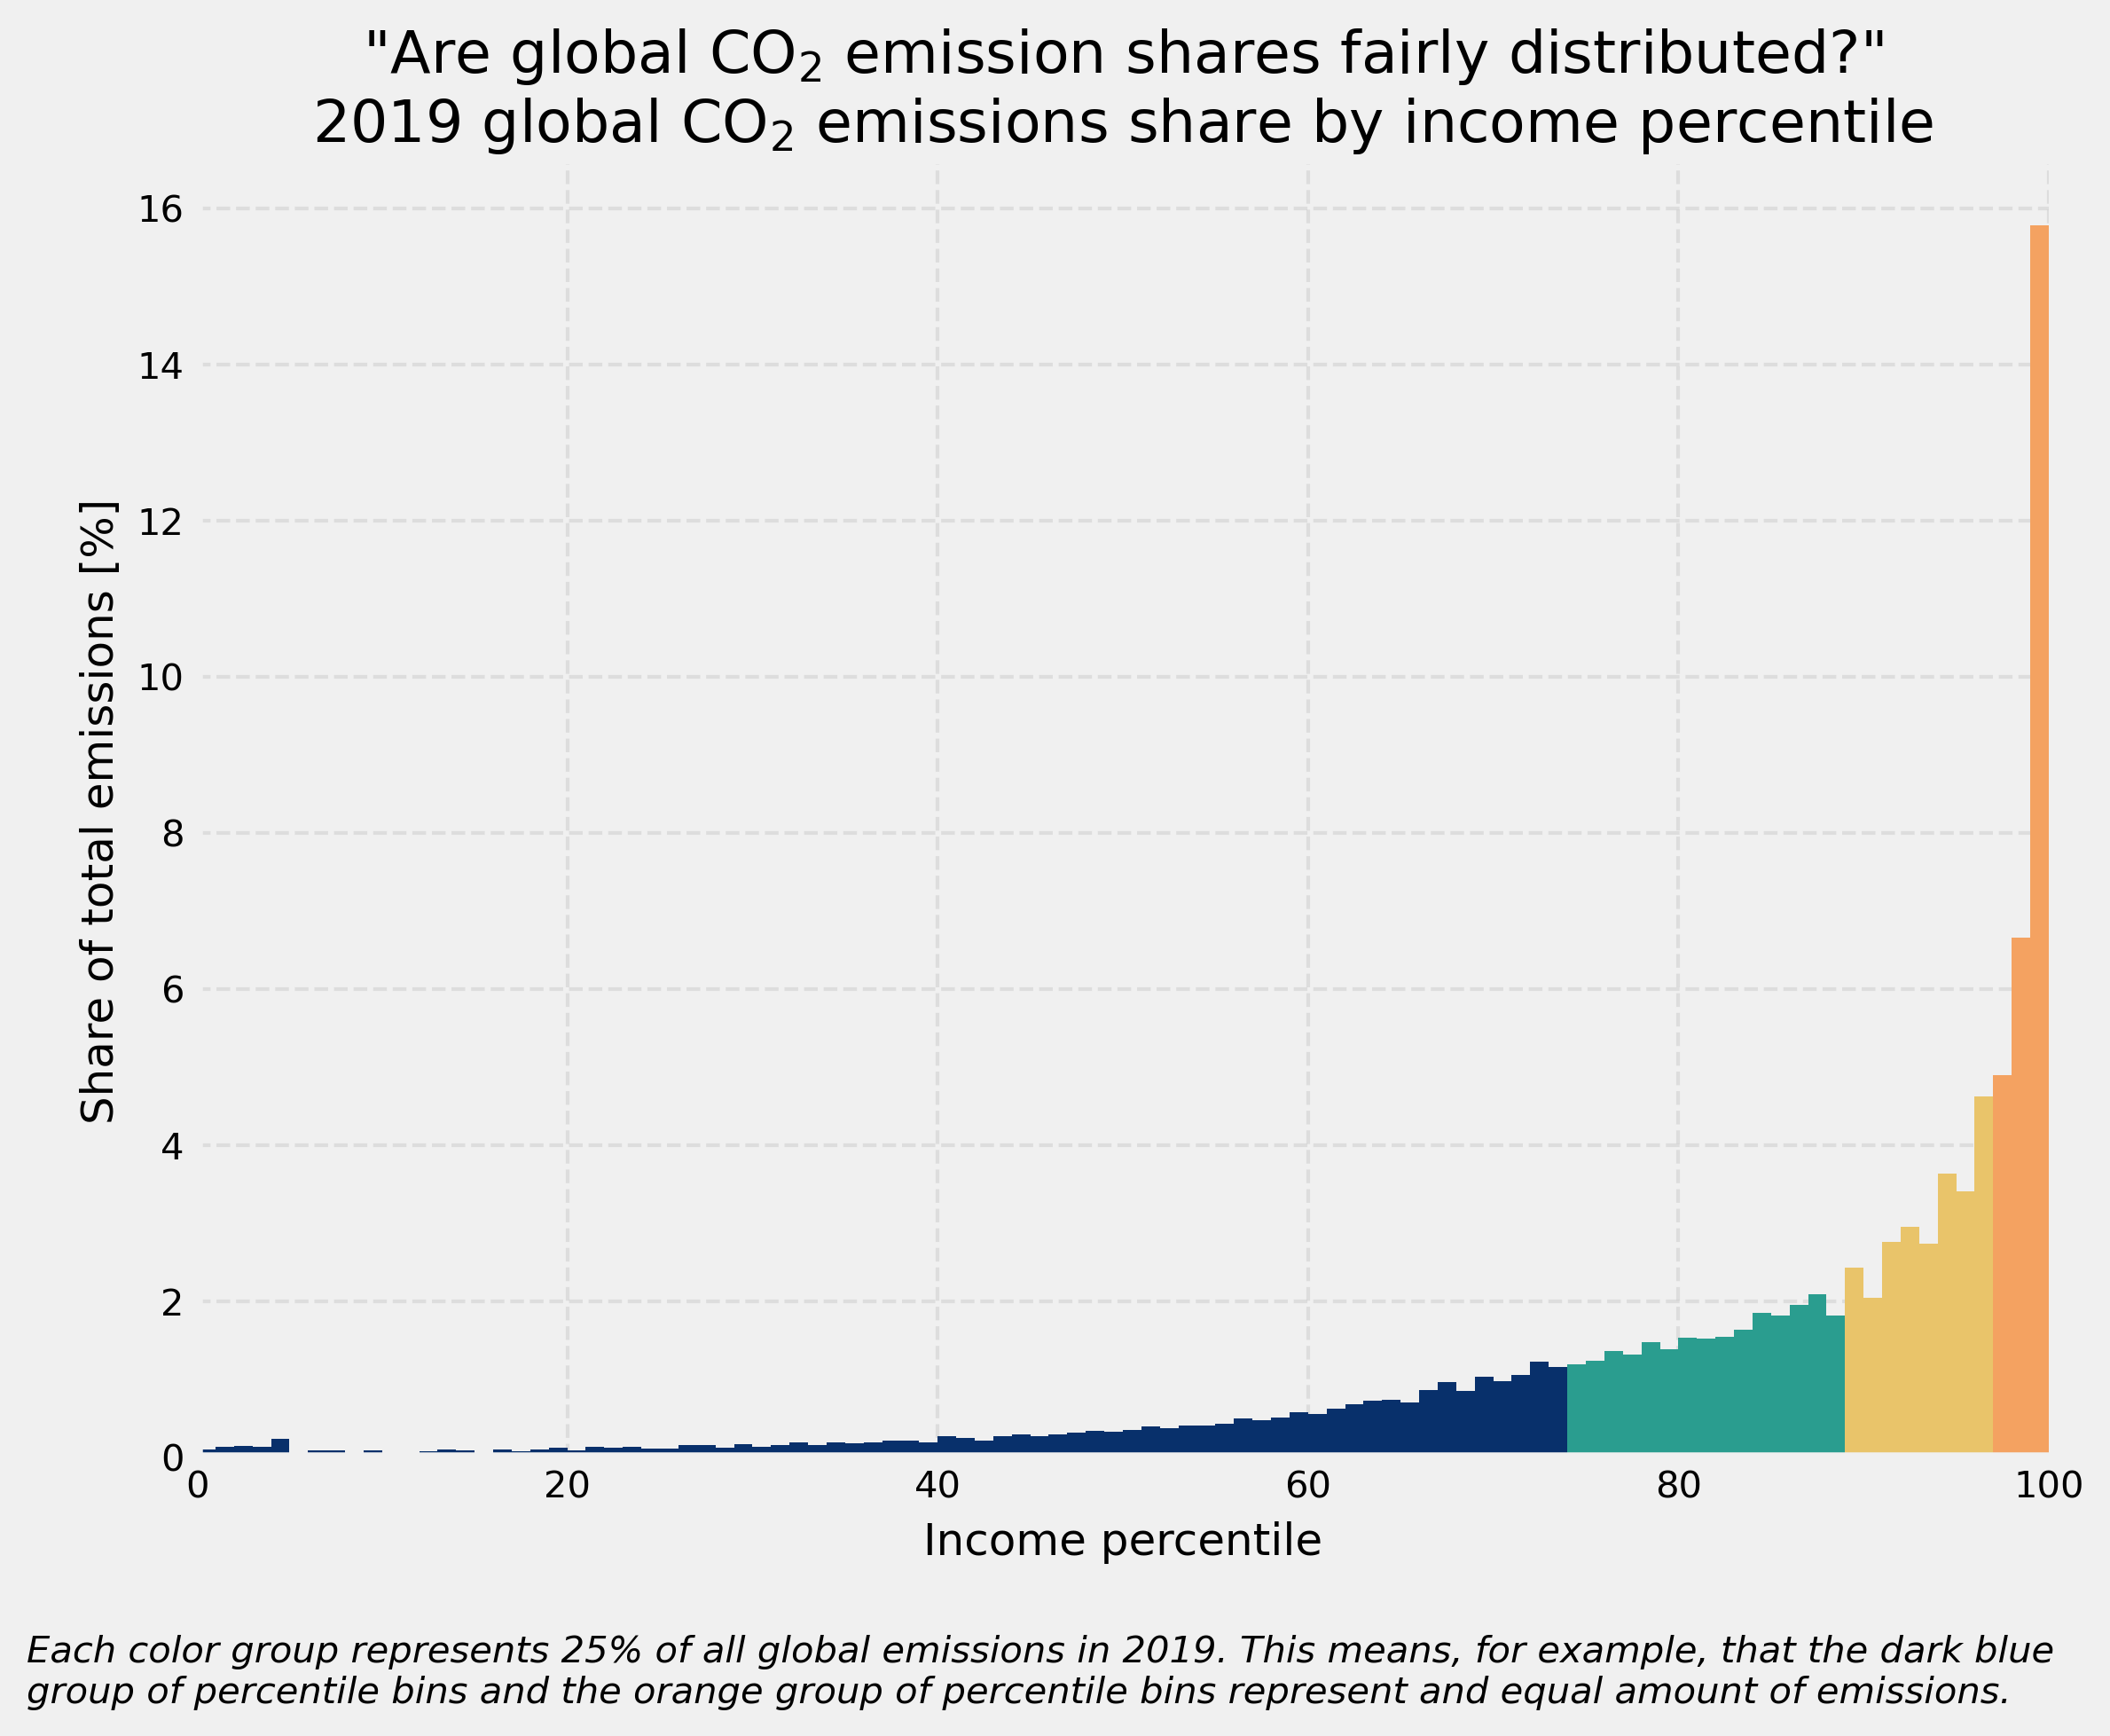

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(8, 6), dpi=300)

plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

data_df['CumulativeSum'] = data_df['EmissionShare'].cumsum()

total_sum = data_df['EmissionShare'].sum()

# Define the color map
colors = ['#08306b' if cum_sum <= total_sum/4 else '#2a9d8f' if cum_sum <= total_sum/2 else '#e9c46a' if cum_sum <= 3*total_sum/4 else '#f4a261' for cum_sum in data_df['CumulativeSum']]

plt.bar(data_df['Percentile'], data_df['EmissionShare'], width=1, align='edge', color=colors)

plt.title('"Are global CO$_2$ emission shares fairly distributed?"\n2019 global CO$_2$ emissions share by income percentile', fontsize=16)
plt.xlabel('Income percentile', fontsize=12)
plt.ylabel('Share of total emissions [%]', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.xlim(0, 100)

legend_elements = [Patch(facecolor='#08306b', label='25% of total emissions'),
                   Patch(facecolor='#2a9d8f', label='25% of total emissions'),
                   Patch(facecolor='#e9c46a', label='25% of total emissions'),
                   Patch(facecolor='#f4a261', label='25% of total emissions')]


txt="Each color group represents 25% of all global emissions in 2019. This means, for example, that the dark blue group of percentile bins and the orange group of percentile bins represent and equal amount of emissions."
plt.text(0, -0.08, txt, ha='left', wrap=True, fontsize=10, transform=plt.gcf().transFigure, style='italic')

#plt.legend(handles=legend_elements, loc='upper left')

plt.show()

plt.savefig('a2_earnest.png')

These visualizations attempt to answer, "Are global CO2 emission shares fairly distributed?". As a disclaimer, obviously "fairly distributed" is somewhat loaded. Without getting too into the weeds, I was hoping the interpretation would be closer to "equal". I chose "fairly" to add a tad of ambiguity (and controversy) which would make it more difficult to "see through" my deceptive visualization. 

For the earnest visualization, I plotted share of total emissions [%] against income percentile. While it is pretty clear just from the height encoding alone that higher income percentile bins have disproportionate shares of total emissions, I also added a (somewhat redundant) color encoding which represents 4 groups of equal emissions. The intent here was to show how wide this gap really is--globally, people within the top ~10% of income account for HALF of all emissions! And people that make the bottom ~76% of incomes only make up 25% of all emissions. I was originally planning to have a legend here, but it seemed unnecessarily confusing to have either a repeated label for each color, or quantiles when I'm already using percentiles (income). I instead added the caption at the bottom which briefly explains the color encoding with a quick example.

The deceptive visualization still compares emission shares and income, but the twist is that each quantile is represented as a point with a color encoding the percentile. So for each percentile bin (e.g. 88th), the point is plotted with the 88th percentile's income share (as a percentage of all incomes) and emission shares (as a percentage of all emissions). The huge disparities in incomes and emissions that we noted in the earnest visualization is now obscured because the information needed to come to the correct conclusion is confusingly encoded in color and along one of the axes. The discerning reader could still note this disparity if they think about the y spacing of the points relative to their color, but that's pretty confusing! This deceptive visualization could force readers to...
1. unintentionally accept the premise that because you make more money, you get to disproportionately emit CO2 / interpret closeness to the (nonsensical, and purposely distracting) y=x line as some strange proxy for fairness
2. think that there is only a linear disparity in emissions relative to income 

Ultimately, this visualization prays on our bias towards thinking things going in a straight line and/or up and to the right is desirable.